# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import warnings
warnings.filterwarnings('ignore')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/ironhack_labs/lab-descriptive-stats/your-code/Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

#city and state are strings, temperature is float

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
mask = temp['State'] == 'New York'
temp.loc[mask]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
mask = temp['State'] == 'New York'
temp.loc[mask]['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
mask = temp['Temperature'] > 15
temp.loc[mask]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
mask = temp['Temperature'] > 15
temp.loc[mask]['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
above15 = temp['Temperature'] > 15
temp1 = temp.loc[above15]
below20 = temp1['Temperature'] < 20
temp1.loc[below20]['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
states = temp['State'].unique()
for i in states:
    mask = temp['State'] == i
    mean = temp.loc[mask]['Temperature'].mean()
    sd = temp.loc[mask]['Temperature'].std()
    print(f'{i} has a mean temperature of {round(mean, 2)} and a standard deviation of {round(sd, 2)}')

New York has a mean temperature of 10.74 and a standard deviation of 8.13
Connecticut has a mean temperature of 15.83 and a standard deviation of 1.96
New Jersey has a mean temperature of 21.11 and a standard deviation of 1.57


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv('/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/ironhack_labs/lab-descriptive-stats/your-code/employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.dtypes

#all columns are strings except for years and salary which are ints

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

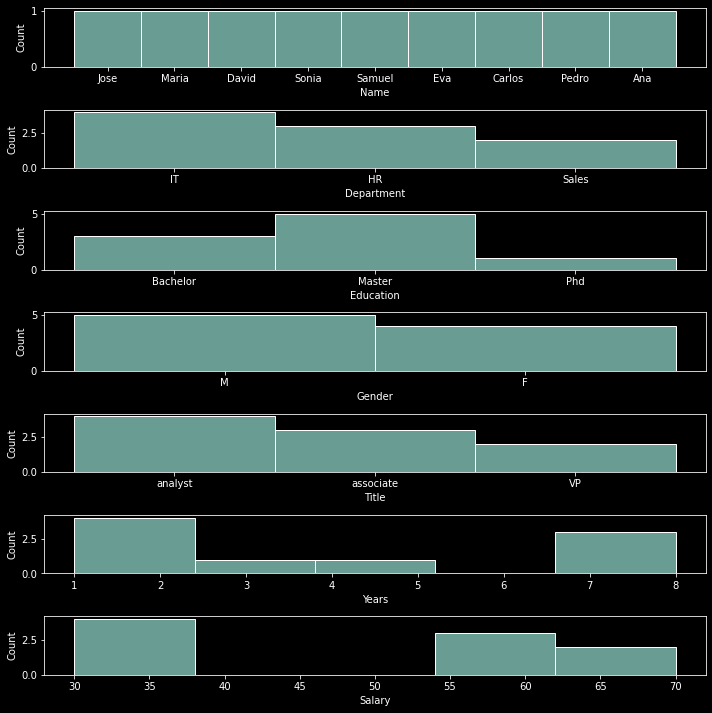

In [13]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 10))
for i in range(0,len(employee.columns)):
    sns.histplot(employee[employee.columns[i]], ax=axes[i])
fig.tight_layout();

#### What's the average salary in this company?

In [14]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [15]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [16]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [17]:
mask = employee['Salary'] == employee['Salary'].min()
employee.loc[mask]['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [18]:
mask = employee['Name'] == 'David'
employee.loc[mask]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [33]:
mask = employee['Name'] == 'David'
employee.loc[mask]['Salary'][2]

30

#### Print all the rows where job title is associate

In [34]:
mask = employee['Title'] == 'associate'
employee.loc[mask]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [35]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [37]:
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [45]:
mask1 = employee['Title'] == 'associate'
mask2 = employee['Salary'] > 55
employee.loc[mask1].loc[mask2]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [59]:
pd.DataFrame(employee.groupby('Years')['Salary'].mean())

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [58]:
pd.DataFrame(employee.groupby('Title')['Salary'].mean())

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [61]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


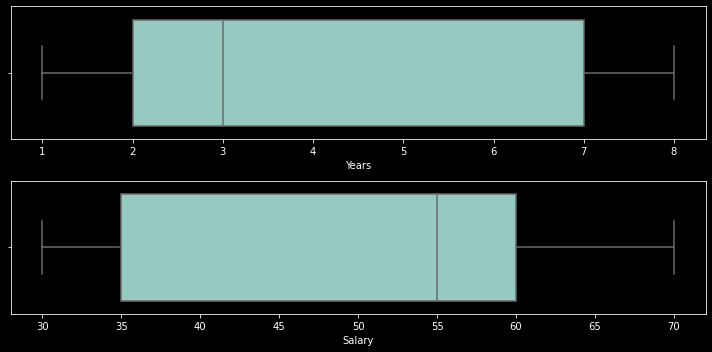

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
for i in range(0,len(employee.select_dtypes(include = np.number).columns)):
    sns.boxplot(employee[employee.select_dtypes(include = np.number).columns[i]], ax=axes[i])
fig.tight_layout();

In [87]:
employee.describe().T[['25%', '75%']]

,25%,75%
Years,2.0,7.0
Salary,35.0,60.0


In [88]:
#1st quartile - column 25% - the 25% of the data is below these values (2 years per Years, 35 usd per Salary)
#3rd quartile - column 75% - the 75% of the data is below these values (7 years per Years, 60 usd per Salary)

#### Is the mean salary per gender different?

In [92]:
pd.DataFrame(employee.groupby('Gender')['Salary'].mean())

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [95]:
employee.describe().T[['min', 'mean', 'max']]

,min,mean,max
Years,1.0,4.111111,8.0
Salary,30.0,48.888889,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [101]:
#using describe
df = employee.groupby('Department')['Salary'].describe()[['max', 'min']]
df['diff_max_min'] = df['max'] - df['min']
df

,max,min,diff_max_min
Department,,,
HR,70.0,30.0,40.0
IT,70.0,30.0,40.0
Sales,55.0,55.0,0.0


In [104]:
#using aggregate
employee.groupby('Department')['Salary'].agg(['max', 'min'])
df['diff_max_min'] = df['max'] - df['min']
df

,max,min,diff_max_min
Department,,,
HR,70.0,30.0,40.0
IT,70.0,30.0,40.0
Sales,55.0,55.0,0.0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [112]:
orders = pd.read_csv('/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/ironhack_labs/lab-descriptive-stats/your-code/Orders.zip', index_col=0)
print(orders.shape)
orders.sample(3)

(397924, 13)


,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
495773,578323,22993,2011,11,3,17,set of 4 pantry jelly moulds,6,2011-11-23 17:19:00,1.25,15743,United Kingdom,7.5
224579,556536,22621,2011,6,1,12,traditional knitting nancy,8,2011-06-13 12:36:00,1.65,17795,United Kingdom,13.2
23861,538255,17012F,2010,12,5,12,origami sandlewood incense/cand set,12,2010-12-10 12:33:00,2.55,14911,EIRE,30.6


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [113]:
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [115]:
orders.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,397924.0,NaN,NaN,NaN,560617.126645,13106.167695,536365.0,549234.0,561893.0,572090.0,581587.0
StockCode,397924,3665,85123A,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,397924.0,NaN,NaN,NaN,2010.934259,0.247829,2010.0,2011.0,2011.0,2011.0,2011.0
month,397924.0,NaN,NaN,NaN,7.612537,3.416527,1.0,5.0,8.0,11.0,12.0
day,397924.0,NaN,NaN,NaN,3.614555,1.928274,1.0,2.0,3.0,5.0,7.0
hour,397924.0,NaN,NaN,NaN,12.728247,2.273535,6.0,11.0,13.0,14.0,20.0
Description,397924,3877,white hanging heart t-light holder,2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,397924.0,NaN,NaN,NaN,13.021823,180.42021,1.0,2.0,6.0,12.0,80995.0
InvoiceDate,397924,17286,2011-11-14 15:27:00,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,397924.0,NaN,NaN,NaN,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75


####  What is the average Purchase Price?

In [117]:
orders['UnitPrice'].mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [118]:
orders['UnitPrice'].max()

8142.75

In [119]:
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [138]:
mask = orders['Country'] == 'Spain'
orders.loc[mask]['CustomerID'].unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [152]:
mask = orders['Country'] == 'Spain'
df = pd.DataFrame(orders.loc[mask]['CustomerID'].value_counts())
df

,CustomerID
12540,478
12484,346
12539,273
17097,211
12597,206
12502,147
12556,121
12546,69
12462,62
12354,58


In [151]:
print(f'Total unique customers in Spain: {len(df)}')
print(f'Total orders made by customers in Spain: {sum(df["CustomerID"])}')

Total unique customers in Spain: 30
Total orders made by customers in Spain: 2485


#### Select all the customers who have bought more than 50 items ?

In [153]:
mask = orders['Quantity'] > 50
orders.loc[mask]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [162]:
mask1 = orders['Country'] == 'Spain'
mask2 = orders['Quantity'] > 50
orders.loc[mask1].loc[mask2].sample(5) #only visible 5 random rows

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
426665,573362,22598,2011,10,7,13,christmas musical zinc tree,72,2011-10-30 13:06:00,0.29,12597,Spain,20.88
52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
398639,571255,72802B,2011,10,5,17,ocean scent candle in jewelled box,200,2011-10-14 17:13:00,1.25,12454,Spain,250.00
52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
248801,558871,84997B,2011,7,1,13,childrens cutlery retrospot red,72,2011-07-04 13:19:00,3.75,12557,Spain,270.00


#### Select all free orders

In [163]:
mask = orders['amount_spent'] == 0
orders.loc[mask].sample(5) #only visible 5 random rows

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
314746,564651,23268,2011,8,5,14,set of 2 ceramic christmas reindeer,192,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
314745,564651,23270,2011,8,5,14,set of 2 ceramic painted hearts,96,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [171]:
mask = orders['Description'].str.contains('lunch bag')
orders.loc[mask].sample(5) #only visible 5 random rows

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
538166,581400,22382,2011,12,4,13,lunch bag spaceboy design,5,2011-12-08 13:36:00,1.65,14056,United Kingdom,8.25
455338,575610,20725,2011,11,4,12,lunch bag red retrospot,10,2011-11-10 12:45:00,1.65,16628,United Kingdom,16.50
461805,575952,22383,2011,11,7,11,lunch bag suki design,3,2011-11-13 11:55:00,1.65,16015,United Kingdom,4.95
368787,568996,23207,2011,9,4,17,lunch bag alphabet design,10,2011-09-29 17:16:00,1.65,13131,United Kingdom,16.50
357232,568069,22662,2011,9,5,14,lunch bag dolly girl design,10,2011-09-23 14:05:00,1.65,13336,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [174]:
mask1 = orders['Description'].str.contains('lunch bag')
mask2 = orders['year'] == 2011
orders.loc[mask1].loc[mask2].sample(5) #only visible 5 random rows

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
223500,556484,20726,2011,6,7,13,lunch bag woodland,2,2011-06-12 13:17:00,1.65,16938,United Kingdom,3.30
535104,581188,20728,2011,12,3,16,lunch bag cars blue,10,2011-12-07 16:47:00,1.65,17735,United Kingdom,16.50
517945,580103,22384,2011,12,4,15,lunch bag pink polkadot,10,2011-12-01 15:12:00,1.65,16242,United Kingdom,16.50
229425,557055,23209,2011,6,4,14,lunch bag doiley pattern,40,2011-06-16 14:45:00,1.65,12621,Germany,66.00
158956,550320,22383,2011,4,7,12,lunch bag suki design,1,2011-04-17 12:37:00,1.65,12748,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

Due to the outliers, the plot is not very clear, this is why I have added boxplot and histogram


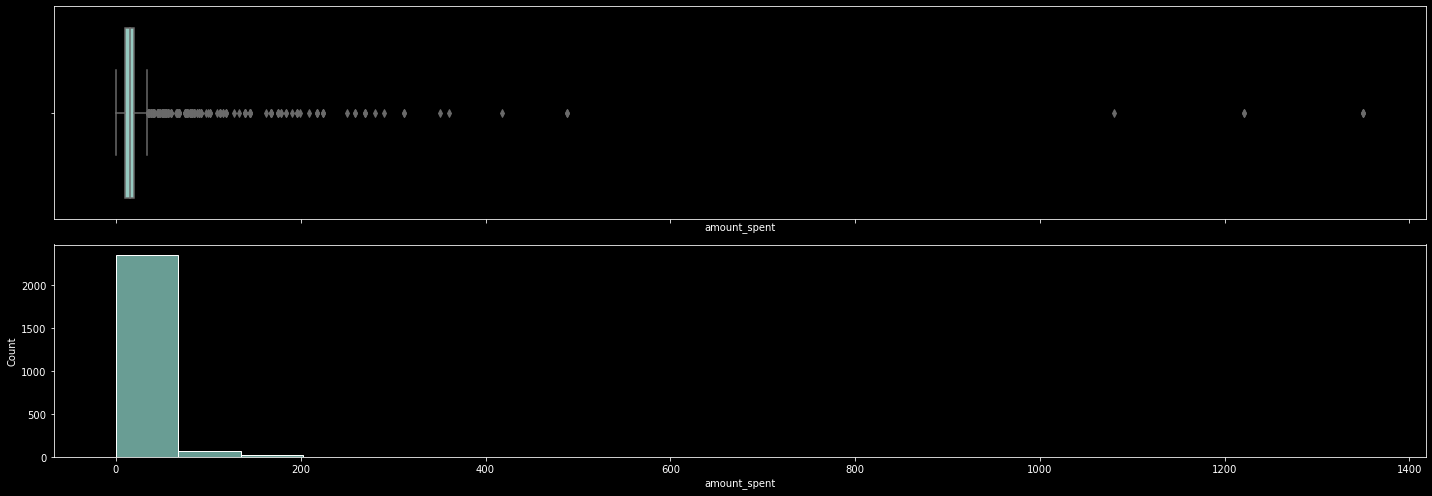

In [214]:
mask = orders['Country'] == 'Spain'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 7), sharex=True)
print('Due to the outliers, the plot is not very clear, this is why I have added boxplot and histogram')
sns.histplot(data=orders.loc[mask]['amount_spent'], bins=20, kde=False, ax=axes[1])
sns.boxplot(orders.loc[mask]['amount_spent'], ax=axes[0])
fig.tight_layout();

#### Select all orders made in the month of August

In [229]:
mask = orders['month'] == 8
orders.loc[mask].sample(5) #only visible 5 random rows

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
298564,563023,23332,2011,8,4,13,ivory wicker heart large,12,2011-08-11 13:39:00,1.65,14639,United Kingdom,19.80
302903,563477,22630,2011,8,2,15,dolly girl lunch box,2,2011-08-16 15:39:00,1.95,17097,Spain,3.90
319382,564851,82581,2011,8,2,16,toilet metal sign,25,2011-08-30 16:53:00,0.55,13183,United Kingdom,13.75
289544,562271,23315,2011,8,3,17,ivory refectory clock,1,2011-08-03 17:05:00,9.95,16098,United Kingdom,9.95
306839,563848,22464,2011,8,5,14,hanging metal heart lantern,12,2011-08-19 14:57:00,1.65,14911,EIRE,19.80


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [236]:
mask = orders['month'] == 8
orders.loc[mask].groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country

In [239]:
pd.DataFrame(orders.groupby('Country')['amount_spent'].mean().sort_values(ascending=False))

,amount_spent
Country,
Netherlands,120.798282
Australia,116.895620
Japan,116.561900
Singapore,95.852658
Sweden,85.096075
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.687745


#### What's the most expensive item?

In [256]:
orders.loc[orders['UnitPrice'] == orders['UnitPrice'].max()]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [258]:
pd.DataFrame(orders.groupby('year')['amount_spent'].mean())

,amount_spent
year,
2010,21.892733
2011,22.430074
